# Brain Tumor Classifier

In [41]:
#import pandas as pd
import os
import matplotlib.pyplot as plt
import cv2
import numpy as np
from sklearn.neural_network import MLPClassifier
from joblib import dump
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score

In [2]:
%matplotlib inline

## functions

In [3]:
# a function to view an image from a numpy array using matplotlib
def viewImg(arr,index):
    plt.matshow(arr[index], cmap = plt.cm.gray)
    plt.xticks(())
    plt.yticks(())
    plt.show()

In [4]:
# a function to reshape a 4 dimensional(4D) numpy array to a 2 dimensional(2D) one
def reshape(arr):
    num_samples = arr.shape[0]  # Number of samples
    image_height = arr.shape[1]  # Height of the image
    image_width = arr.shape[2]  # Width of the image
    num_channels = arr.shape[3]  # Number of channels (e.g., 3 for RGB)
    return arr.reshape(num_samples, image_height * image_width * num_channels)

In [5]:
# a function to get the data of resized images(numpy arrays) using the name of the directory
def getData(dataset_dir, width, height, maxImg):
    X = []
    y = []
    
    for folder in os.listdir(dataset_dir):
        folder_path = os.path.join(dataset_dir, folder)
        if not os.path.isdir(folder_path):
            continue

        label = folder
        
        i = 1
        for file in os.listdir(folder_path):
            if i > maxImg:
                break
            
            file_path = os.path.join(folder_path, file)
            if not os.path.isfile(file_path):
                continue

            img = cv2.imread(file_path)
            img = cv2.resize(img, (width, height))

            X.append(img)
            y.append(label)
            
            i += 1
            
    return np.array(X), y

## Data processing

In [6]:
'''
df = pd.read_csv("Brain Tumor.csv")
df.describe()

for i in range(3762):
    old_path = os.getcwd() + f"/data/{df['Image'][i]}.jpg"
    new_path = os.getcwd() + f"/data/{df['Class'][i]}/{df['Image'][i]}.jpg"
    os.rename(old_path, new_path)
'''

'\ndf = pd.read_csv("Brain Tumor.csv")\ndf.describe()\n\nfor i in range(3762):\n    old_path = os.getcwd() + f"/data/{df[\'Image\'][i]}.jpg"\n    new_path = os.getcwd() + f"/data/{df[\'Class\'][i]}/{df[\'Image\'][i]}.jpg"\n    os.rename(old_path, new_path)\n'

In [7]:
X, y = getData("data", 100, 100, 500)#collecting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 209)

In [8]:
#processing the training data
X_train_reshaped = reshape(X_train)

for i, c in enumerate(y_train):
    y_train[i] = int(y_train[i])

#processing the testing data
X_test_reshaped = reshape(X_test)

for i, c in enumerate(y_test):
    y_test[i] = int(y_test[i])

### Viewing the data

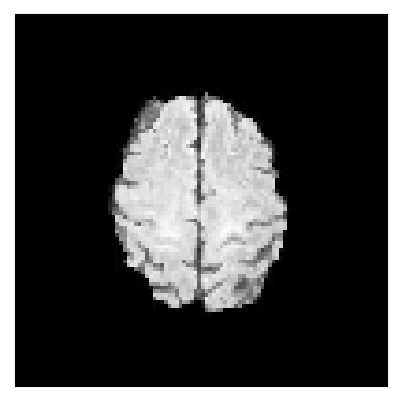

In [9]:
viewImg(X_train,171)

In [10]:
y_train[171]

0

## Training the model

In [26]:
model = MLPClassifier(
    solver = "adam", 
    activation = "relu", 
    max_iter = 1000
)

In [27]:
model.fit(X_train_reshaped, y_train)

MLPClassifier(max_iter=1000)

## Evaluating the model

In [51]:
print(f"Accuracy Score : { model.score(X_test_reshaped,y_test) } ")#Printing the score of the model using the test data

Accuracy Score : 0.832 


In [47]:
y_pred = model.predict(X_test_reshaped)
print(f"Precision Score : { precision_score(y_test, y_pred) }")
print(f"Recall Score : { recall_score(y_test, y_pred) }")

Precision Score : 0.8725490196078431
Recall Score : 0.7542372881355932


## Testing using an image

In [53]:
model.predict([X_test_reshaped[173]])#predicting the value

array([1])

In [54]:
y_test[173]#actual value

1

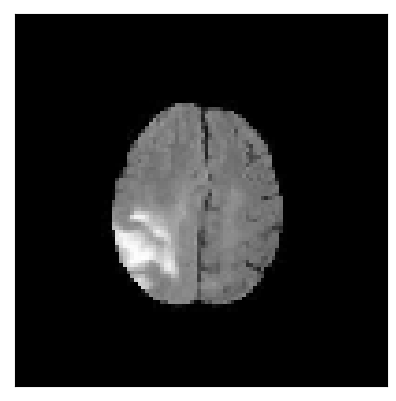

In [55]:
viewImg(X_test, 173)#viewing the image

## Saving the model

In [32]:
dump(model, "savedModel.pkl")

['savedModel.pkl']